# Superstore Business Intelligence Project  
## Notebook 02: Exploratory Data Analysis & Business Validation  

### Objective

This notebook explores the enriched dataset to uncover:

- Regional performance patterns  
- Category profitability behavior  
- Discount impact on profit  
- Operational efficiency insights  
- Correlation structure across financial variables  

This layer translates raw data into business intelligence.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("../data/superstore_enriched.csv")

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Days,Late_Shipments,Profit_Margin,Loss_Flag,Discount_Bucket,Order_Year,Order_Month,Order_Month_Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0,0.1600,0,No Discount,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820,3,0,0.3000,0,No Discount,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0,0.4700,0,No Discount,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,1,-0.4000,1,High,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,1,0.1125,0,Low,2015,10,October


____________________________________________________
## Regional Performance
____________________________________________________

In [5]:
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Shipping_Days': 'mean'
}).reset_index()

region_summary.sort_values(by='Sales', ascending=False)

,Region,Sales,Profit,Shipping_Days
3,West,725457.8245,108418.4489,3.929753
1,East,678781.2400,91522.7800,3.908708
0,Central,501239.8908,39706.3625,4.058115
2,South,391721.9050,46749.4303,3.958025


### Regional Performance Insight

This aggregation evaluates:

- Revenue concentration by region  
- Profit generation efficiency  
- Average shipping duration  

Helps assess operational and financial regional efficiency.

_________________________________________________
## Category Profitability
_________________________________________________

In [8]:
category_summary = df.groupby('Category').agg({
    'Sales' : 'sum',
    'Profit' : 'sum',
    'Profit_Margin' : 'mean'
}).reset_index()

category_summary

,Category,Sales,Profit,Profit_Margin
0,Furniture,741999.7953,18451.2728,0.038784
1,Office Supplies,719047.0320,122490.8008,0.138030
2,Technology,836154.0330,145454.9481,0.156138


### Category-Level Evaluation

We evaluate:

- Which category drives highest revenue  
- Which category delivers strongest profitability  
- Average profit margin comparison  

This reveals structural strengths or weaknesses in product mix.

___________________________________________
## Discount Impact Analysis
___________________________________________

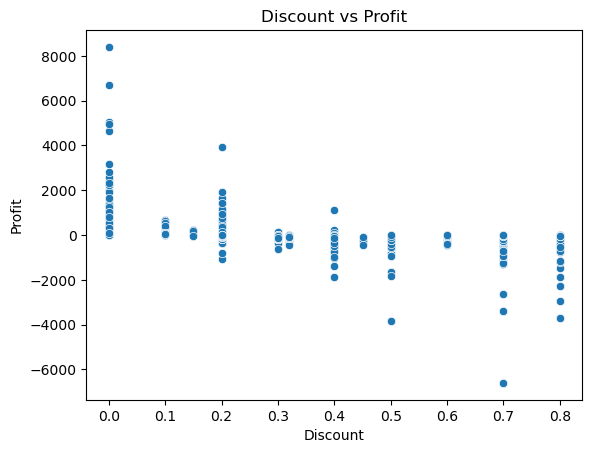

In [9]:
plt.figure()
sns.scatterplot(x=df['Discount'], y=df['Profit'], )
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

### Discount-Profit Relationship

This visualization helps validate:

- Whether aggressive discounting erodes profitability  
- If nonlinear patterns exist  
- Presence of extreme loss cases  

This insight is critical for pricing strategy.

___________________________________
## Correlation Analysis
__________________________________

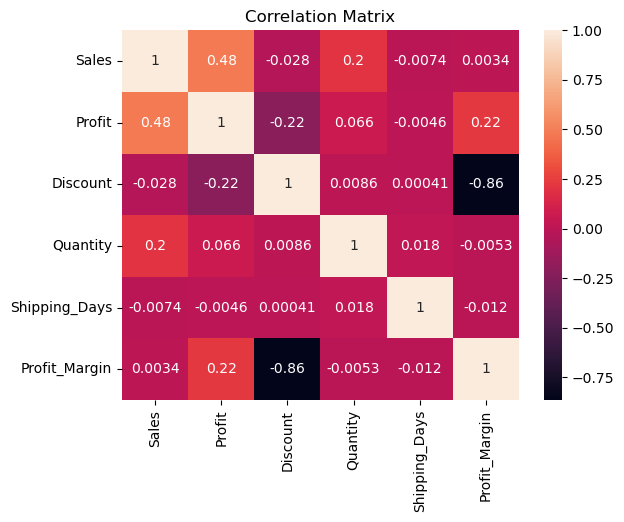

In [11]:
plt.figure()
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping_Days', 'Profit_Margin']].corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

### Correlation Structure

Correlation analysis helps identify:

- Strength of linear relationships  
- Multicollinearity risk for regression modeling  
- Financial dependency patterns  

This prepares foundation for statistical modeling.

_______________________________________________
## LOSS TRANSCATION ANALYSIS
_______________________________________________

In [12]:
loss_rate = df['Loss_Flag'].mean() * 100
loss_rate

18.721232739643785

### Loss Transaction Rate

This metric shows the percentage of transactions generating negative profit.

A high loss rate may indicate:

- Over-discounting  
- Inefficient product pricing  
- Cost structure imbalance

____________________________________________
## Shipping Efficiency Validation
____________________________________________

In [14]:
late_rate = df['Late_Shipments'].mean() * 100
late_rate

18.250950570342205

### Operational Efficiency Metric

Late shipment rate quantifies delivery performance.

Higher delay percentages suggest logistical inefficiencies that may impact customer satisfaction.

## Notebook 02 Summary

Key Findings:

- Regional sales and profitability vary significantly.
- Discount intensity shows visible impact on profit levels.
- Certain categories demonstrate stronger margins.
- A measurable percentage of transactions operate at a loss.
- Operational shipping delays are quantifiable.

This notebook transforms enriched data into actionable business intelligence.

Next Step:

Notebook 03 → Statistical Inference  
(We will formally test these observed patterns.)